## Seung Jun Choi in Urban Information Lab
### PCA and Visual Representation

# What is PCA?

(https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)

If you’ve worked with many variables before, you know this can create challenges. Do you understand the relationships between each variable? Do you have so many variables that you risk overfitting your model or violating assumptions of your chosen modeling technique?

You might ask, “How do I take all of the variables I’ve collected and focus on only a few of them?” In technical terms, this means you want to **reduce the dimensionality of your feature space**. By reducing the dimensionality, you have fewer relationships to consider between variables, which lowers the risk of overfitting. (Note: This doesn’t mean overfitting is no longer a concern, but it’s a step in the right direction.)

Unsurprisingly, reducing the **dimension** of the feature space is called **dimensionality reduction**. There are many ways to achieve this, but most techniques fall into two categories:

* **Feature Elimination**
* **Feature Extraction**

### Feature Elimination

Feature elimination does exactly what it sounds like: we reduce the feature space by removing features.
**Advantages:** It’s simple and preserves the interpretability of your variables.
**Disadvantages:** You lose all information from the features you eliminate. Any benefits those dropped variables might have contributed are entirely gone.

### Feature Extraction

Feature extraction avoids this problem. Suppose we have ten independent variables. In feature extraction, we create ten “new” independent variables, each of which is a combination of the original ten. These new variables are ordered by how well they predict the dependent variable.

You might wonder, “Where does the dimensionality reduction happen?” We keep as many of the new variables as needed and drop the **least important ones**. Because the new variables are combinations of the original variables, we retain the most valuable parts of all original features, even when dropping some new variables.

**Principal Component Analysis (PCA)** is a feature extraction technique. PCA combines input variables in a specific way, allowing us to drop the least important variables while preserving the most valuable information.

**Bonus:** Each new variable after PCA is independent of the others. This is helpful because linear models assume independent variables. If you fit a linear regression model using these new variables (called principal component regression), this assumption will automatically be satisfied.

---

## When Should I Use PCA?

Consider PCA if:

1. You want to reduce the number of variables but cannot identify specific variables to remove.
2. You want your variables to be independent of each other.
3. You are comfortable making your independent variables less interpretable.

If you answer “yes” to all three, PCA is suitable. If you answer “no” to question 3, avoid PCA.

---

## How Does PCA Work?

1. Calculate a matrix summarizing the relationships between all variables.
2. Decompose this matrix into two components: **direction** and **magnitude**. This reveals the “directions” of the data and their “importance.”
3. Transform the original data to align with these important directions (combinations of the original variables).
4. By projecting the data into a smaller space, we reduce dimensionality while retaining all original information.

---

### Step-by-Step PCA

Before starting, organize your data in a table with **n rows** and **p + 1 columns**, where one column corresponds to the dependent variable $Y$ and the remaining $p$ columns are independent variables $X$.

1. If a dependent variable $Y$ exists, separate the data into $Y$ and $X$. Most PCA operations will work on $X$ only.
2. Center each column of $X$ by subtracting its mean from every entry. (This ensures each column has a mean of zero.)
3. Standardize the variables if necessary. If feature importance is independent of variance, divide each column by its standard deviation. Call the centered (and possibly standardized) matrix $Z$.
4. Compute $Z^T Z$ (transpose of $Z$ multiplied by $Z$). This is the covariance matrix of $Z$ up to a constant.
5. Calculate the **eigenvectors** and **eigenvalues** of $Z^T Z$. In most software packages, this is easy to compute as the decomposition $Z^T Z = P D P^{-1}$, where $P$ is the eigenvector matrix and $D$ is a diagonal matrix of eigenvalues. Each eigenvalue in $D$ corresponds to its eigenvector in $P$.
6. Sort eigenvalues $\lambda_1, \lambda_2, \dots, \lambda_p$ from largest to smallest, and reorder eigenvectors accordingly. Call this sorted matrix $P^*$. The eigenvectors are independent.
7. Transform the data: $Z^* = Z P^*$. Each column of $Z^*$ is a combination of the original variables and independent of the others.

> Because the principal components are orthogonal, they are statistically linearly independent.

8. Decide how many features to keep. Common methods:

   * **Method 1:** Keep a fixed number of principal components (e.g., 5).
   * **Method 2:** Keep enough components to explain a target proportion of variability (e.g., 90%).
   * **Method 3:** Use the “elbow method” from a scree plot to identify where the explained variability drops sharply. This method is subjective and may retain only a portion of the total variability.

# Mathematics of PCA

(https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf)

We start with $p$-dimensional vectors and aim to summarize them by projecting them into a $q$-dimensional subspace. The summary will be the projection of the original vectors onto $q$ directions, called the **principal components**, which span the subspace.

There are several mathematically equivalent ways to derive the principal components. **The simplest is to find the projections that maximize variance.** The first principal component is the direction along which the projections have the largest variance. The second principal component maximizes variance among directions orthogonal to the first. The $k$th component maximizes variance orthogonal to the previous $k-1$ components. **There are $p$ principal components in total.**

Rather than maximizing variance, one might also consider minimizing the average (mean-squared) distance between the original vectors and their projections onto the principal components. It turns out that this is equivalent to maximizing variance.

Assume the data have been **centered**, so each variable has mean zero. Let the centered data be written in a matrix $\mathbf{X}$, where rows are objects and columns are variables. Then:

$$
\mathbf{X}^T \mathbf{X} = n \mathbf{V},
$$

where $\mathbf{V}$ is the covariance matrix of the data.

---

## Minimizing Projection Residuals

Start with a one-dimensional projection. Let $\mathbf{w}$ be a unit vector along the line we want to project onto. The projection of a data vector $\mathbf{x}_i$ onto this line is $\mathbf{x}_i \cdot \mathbf{w}$, a scalar representing the distance from the origin. The coordinate in $p$-dimensional space is:

$$
(\mathbf{x}_i \cdot \mathbf{w}) \mathbf{w}.
$$

Since the data are centered, the mean of the projections is zero:

$$
\frac{1}{n} \sum_{i=1}^n (\mathbf{x}_i \cdot \mathbf{w}) \mathbf{w} = \left(\frac{1}{n} \sum_{i=1}^n \mathbf{x}_i \cdot \mathbf{w}\right) \mathbf{w} = 0.
$$

The residual or error of the projection for a single vector $\mathbf{x}_i$ is:

$$
\|\mathbf{x}_i - (\mathbf{x}_i \cdot \mathbf{w}) \mathbf{w}\|_2^2 = \|\mathbf{x}_i\|_2^2 - (\mathbf{w} \cdot \mathbf{x}_i)^2,
$$

because $\mathbf{w} \cdot \mathbf{w} = 1$.

The mean squared error (MSE) of the projection is:

$$
\text{MSE}(\mathbf{w}) = \frac{1}{n} \sum_{i=1}^n \|\mathbf{x}_i - (\mathbf{x}_i \cdot \mathbf{w}) \mathbf{w}\|_2^2 = \frac{1}{n} \left( \sum_{i=1}^n \|\mathbf{x}_i\|_2^2 - \sum_{i=1}^n (\mathbf{w} \cdot \mathbf{x}_i)^2 \right).
$$

To minimize MSE, we must maximize

$$
\sum_{i=1}^n (\mathbf{w} \cdot \mathbf{x}_i)^2,
$$

which is equivalent to maximizing the variance of the projections because the mean of the projections is zero.

---

## Maximizing Variance

Stack the $n$ data vectors into an $n \times p$ matrix $\mathbf{X}$. The projection $\mathbf{X} \mathbf{w}$ is an $n \times 1$ vector. Its variance is:

$$
\sigma_{\mathbf{w}}^2 = \frac{1}{n} (\mathbf{X} \mathbf{w})^T (\mathbf{X} \mathbf{w}) = \mathbf{w}^T \frac{\mathbf{X}^T \mathbf{X}}{n} \mathbf{w} = \mathbf{w}^T \mathbf{V} \mathbf{w}.
$$

We want to choose a unit vector $\mathbf{w}$ to maximize $\sigma_{\mathbf{w}}^2$. This is a Lagrange multiplier problem with the constraint $\mathbf{w}^T \mathbf{w} = 1$:

$$
L(\mathbf{w}, \lambda) = \sigma_{\mathbf{w}}^2 - \lambda (\mathbf{w}^T \mathbf{w} - 1).
$$

The derivatives are:

$$
\frac{\partial L}{\partial \lambda} = \mathbf{w}^T \mathbf{w} - 1, \quad
\frac{\partial L}{\partial \mathbf{w}} = 2 \mathbf{V} \mathbf{w} - 2 \lambda \mathbf{w}.
$$

Setting derivatives to zero gives:

$$
\mathbf{w}^T \mathbf{w} = 1, \quad \mathbf{V} \mathbf{w} = \lambda \mathbf{w}.
$$

Thus, the desired vector $\mathbf{w}$ is an **eigenvector** of the covariance matrix $\mathbf{V}$. The vector associated with the **largest eigenvalue** maximizes variance.

---

The **eigenvectors of $\mathbf{V}$** are the principal components. They are orthogonal, spanning the $p$-dimensional space.

* The **first principal component** (largest eigenvalue) is the direction of maximum variance.
* The **second principal component** (second eigenvector) is orthogonal to the first and maximizes variance in that orthogonal direction.
* Projections onto all principal components are uncorrelated.

If we use $q$ principal components, the weight matrix is $p \times q$, where each column is an eigenvector of $\mathbf{V}$. The eigenvalues give the variance explained by each component, and the total variance explained by the first $q$ components is

$$
\sum_{i=1}^q \lambda_i.
$$


# Principal Component Analysis - Implementation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

**Principal Component Analysis (PCA)** is a fast and flexible unsupervised method for dimensionality reduction. We briefly introduced it in *Introducing Scikit-Learn*. Its behavior is easiest to understand using a two-dimensional dataset. Consider the following 200 points:

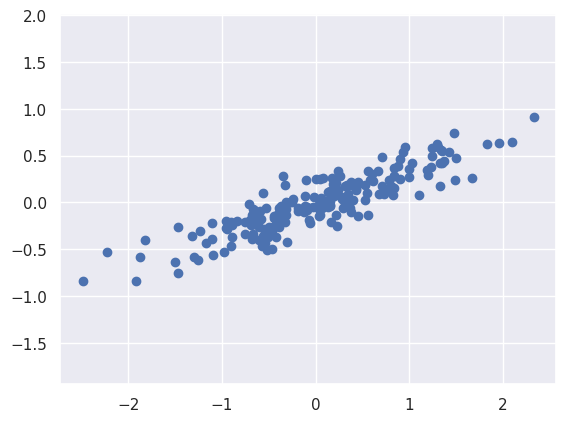

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T #first rand is (0,1], second is random normal
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By visual inspection, it is clear that there is a nearly linear relationship between the $x$ and $y$ variables. This resembles the linear regression data we explored in *In Depth: Linear Regression*. However, the problem setting here is slightly different: rather than predicting $y$ values from $x$ values, the unsupervised learning task aims to learn about the relationship between $x$ and $y$ without focusing on prediction.

In **principal component analysis (PCA)**, this relationship is captured by identifying the **principal axes** of the data and using them to describe the dataset. Using Scikit-Learn’s PCA estimator, we can compute these axes as follows:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

When we fit the PCA model, it learns several important quantities from the data, most notably the principal components and the explained variance.

In [ ]:
print('PCA Components: {}'.format(pca.components_))
print('Explained Variance {}'.format(pca.explained_variance_))

PCA Components: [[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]
Explained Variance [0.7625315 0.0184779]


To understand what these numbers represent, we can visualize them as vectors over the input data. The components define the direction of each vector, while the explained variance determines the squared length of the vector.

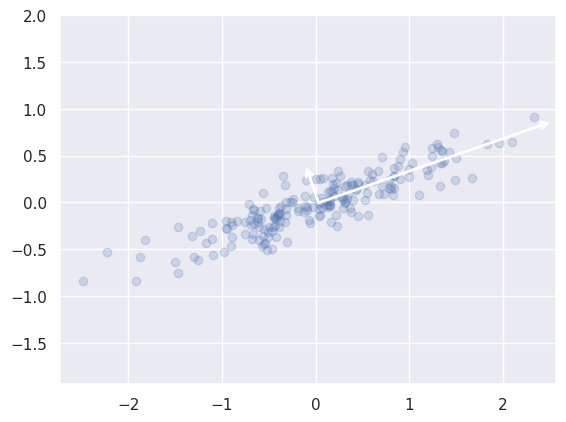

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the principal axes of the data. The length of each vector indicates how "important" that axis is in describing the distribution of the data, in other words, it measures the variance of the data when projected onto that axis. The projection of each data point onto the principal axes gives the principal components of the data.

If we plot these principal components alongside the original data, we obtain a visualization like the one below:

# Principal Components Rotation

[Text(0.5, 0, 'component 1'),
 Text(0, 0.5, 'component 2'),
 Text(0.5, 1.0, 'principal components'),
 (-5.0, 5.0),
 (-3.0, 3.1)]

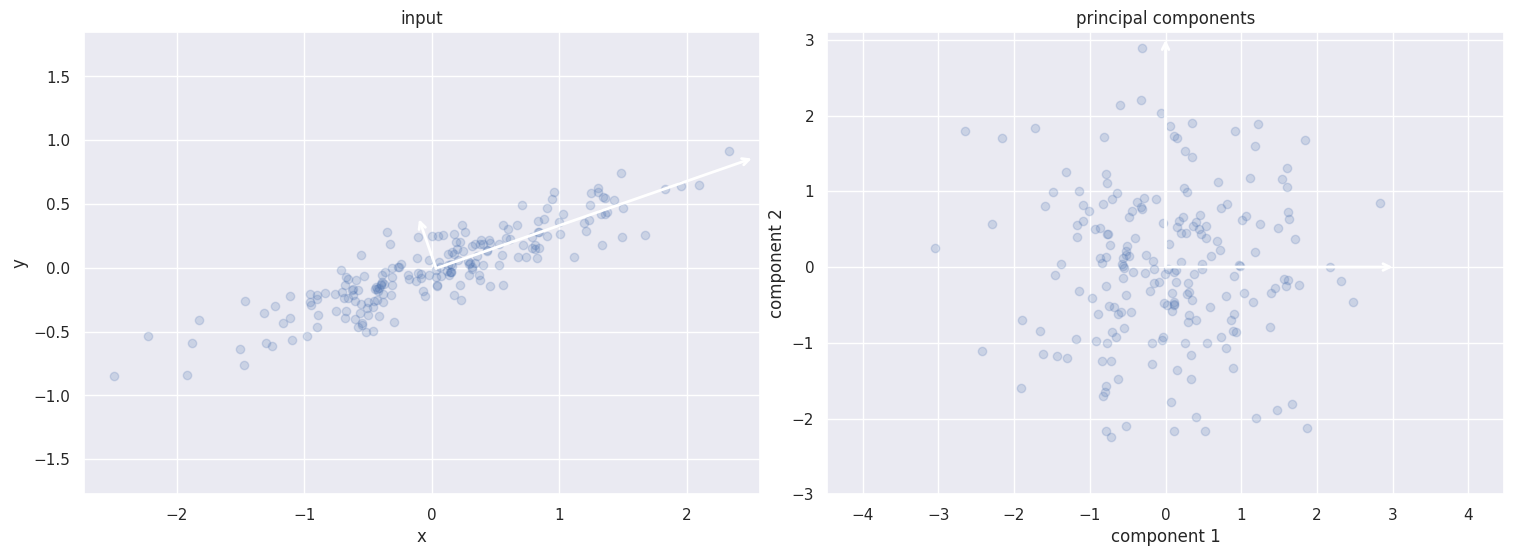

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

#fig.savefig('figures/05.09-PCA-rotation.png')

This transformation from the original data axes to the principal axes is an affine transformation, meaning it consists of a combination of translation, rotation, and uniform scaling.

While the algorithm for finding principal components may initially seem like a purely mathematical curiosity, it actually has wide-ranging applications in machine learning and data exploration.

## PCA as dimensionality reduction
Using PCA for dimensionality reduction involves setting one or more of the smallest principal components to zero. This produces a lower-dimensional projection of the data that preserves as much of the original variance as possible.

Here is an example of using PCA as a dimensionality reduction transformation:

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The data has been reduced to a single dimension through PCA. To understand the effect of this dimensionality reduction, we can perform an inverse transform on the reduced data and plot it alongside the original data:

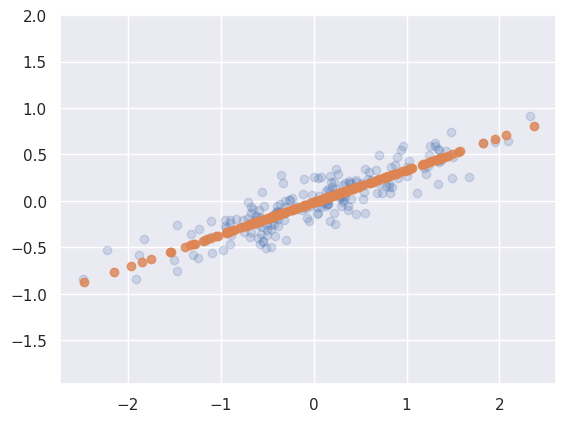

In [ ]:
X_new = pca.inverse_transform(X_pca) #Dot the transformed data with the eigenvector
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points represent the original data, while the dark points show the projected version. This visualization illustrates what PCA dimensionality reduction accomplishes: it removes the information along the least important principal axis or axes, retaining only the components with the highest variance. The fraction of variance removed, reflected by the spread of points around the line in the figure, gives an approximate measure of how much "information" is discarded.

Even with this reduction in dimensionality, the dataset often remains "good enough" to capture the most important relationships between points. In this example, despite reducing the data’s dimension by 50%, the overall structure and relationships among the data points are largely preserved.

## PCA for visualization: Hand-written digits
The benefits of dimensionality reduction may not be immediately obvious in just two dimensions, but they become much clearer with high-dimensional data. To illustrate this, let’s examine the application of PCA to the digits dataset we explored in In-Depth: Decision Trees and Random Forests.

We begin by loading the data:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recall that the data consists of 8×8 pixel images, making each data point 64-dimensional. To better understand the relationships between these points, we can use PCA to project them into a more manageable number of dimensions, say two:

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each data point to explore the structure and relationships in the dataset:

/tmp/ipython-input-2943749715.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('rainbow', 10))


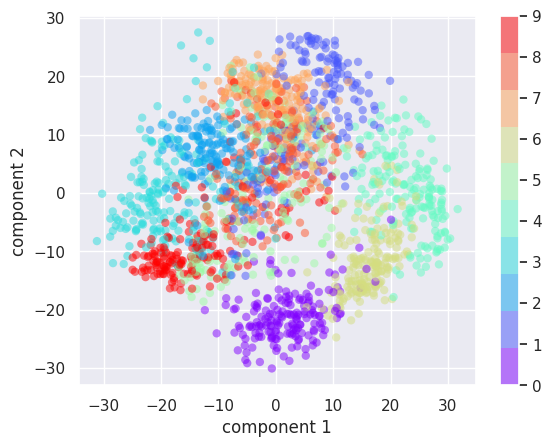

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components represent: the full dataset is a 64-dimensional point cloud, and the plotted points are the projections of each data point along the directions of largest variance. Essentially, PCA finds the optimal stretch and rotation in 64-dimensional space that allows us to visualize the layout of the digits in two dimensions. Importantly, this is done in an unsupervised manner, meaning it does not use the labels at any stage.

## What Do the Components Mean?

We can go a step further and ask what the **reduced dimensions** actually represent. This meaning can be understood in terms of **combinations of basis vectors**. For example, each image in the training set is defined by a collection of 64 pixel values, which we denote as the vector $\mathbf{x}$:

$$
\mathbf{x} = [x_1, x_2, x_3, \dots, x_{64}]
$$

One way to think about this is in terms of a **pixel basis**. To reconstruct the image, we multiply each element of the vector by the pixel it represents and then sum the results:

$$
\text{image}(\mathbf{x}) = x_1 \cdot (\text{pixel 1}) + x_2 \cdot (\text{pixel 2}) + \dots + x_{64} \cdot (\text{pixel 64})
$$

One simple way to reduce the dimensionality of the data is to **zero out all but a few of these basis vectors**. For example, if we retain only the first eight pixels, we obtain an eight-dimensional projection of the data, but this is not very representative of the entire image, as nearly 90% of the pixel information is discarded.


In [ ]:
#Helper function for plotting

def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x

    if components is None:
        components = np.eye(len(coefficients), len(x))

    mean = np.zeros_like(x) + mean


    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")

    approx = mean.copy()

    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

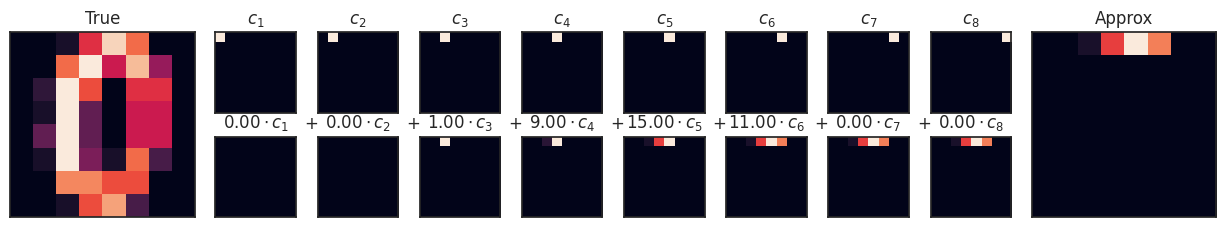

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
sns.set_style('white')

fig = plot_pca_components(digits.data[10],
                          show_mean=False)

#fig.savefig('figures/05.09-digits-pixel-components.png')

The upper row of panels shows the individual pixels, while the lower row illustrates the **cumulative contribution** of these pixels to constructing the image. Using only eight pixel-basis components, we can reconstruct only a small portion of the 64-pixel image. If we continue this process and use all 64 pixels, we would recover the original image completely.

However, the pixel-wise representation is not the only possible choice of basis. We can also use **other basis vectors**, each of which combines contributions from multiple pixels, and write the image as:

$$
\text{image}(\mathbf{x}) = \text{mean} + x_1 \cdot (\text{basis 1}) + x_2 \cdot (\text{basis 2}) + x_3 \cdot (\text{basis 3}) + \dots
$$

PCA can be thought of as a method for choosing **optimal basis functions**, so that adding just the first few of them is sufficient to reconstruct most of the information in the dataset. The **principal components**, which serve as the low-dimensional representation of the data are simply the coefficients multiplying each element in this series.

The figure below shows a similar reconstruction of a digit using the mean plus the first eight PCA basis functions:

---

**Digits PCA Components**

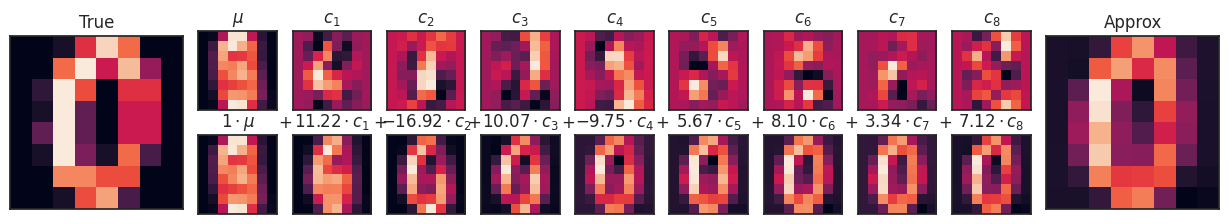

In [ ]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)

#fig.savefig('figures/05.09-digits-pca-components.png')

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image using just the mean plus eight components. The contribution of each pixel to each component reflects the orientation of the vector, similar to our two-dimensional example. This illustrates how PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel basis of the input data.

## Choosing the number of components
A key part of using PCA in practice is determining how many components are needed to adequately describe the data. This can be estimated by examining the cumulative explained variance ratio as a function of the number of components:

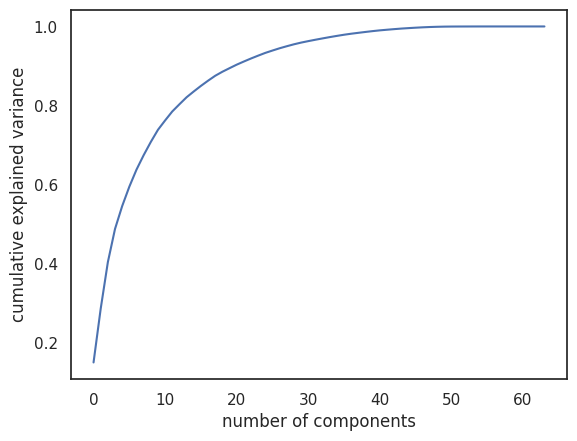

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve shows how much of the total **64-dimensional variance** is captured by the first $N$ components. For instance, in the digits dataset, the first 10 components capture roughly 75% of the variance, while about 50 components are needed to account for nearly 100% of the variance.

From this, we can see that a **two-dimensional projection** discards a substantial amount of information (as measured by explained variance). To retain around 90% of the variance, we would need approximately 20 components. Examining this plot for a high-dimensional dataset provides insight into the **level of redundancy** present across multiple observations.

# PCA as Noise Filtering

PCA can also be used as a filtering technique for noisy data. The idea is simple: components with variance much larger than the noise are relatively unaffected by it. By reconstructing the data using only the largest principal components, we preferentially retain the signal while discarding the noise.

Let’s see how this works with the digits dataset. First, we will plot several examples of the noise-free input data:

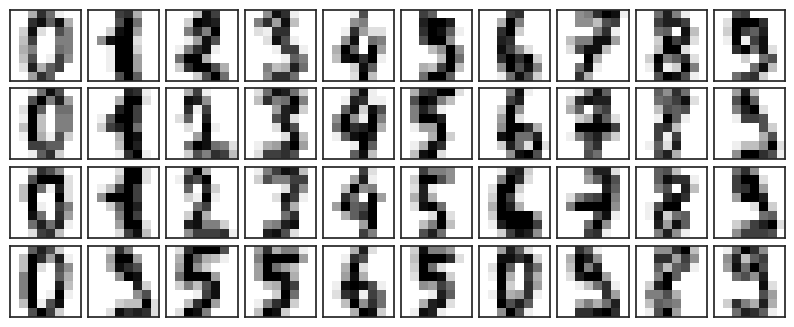

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now let’s add some random noise to create a noisy dataset, and then re-plot the results:

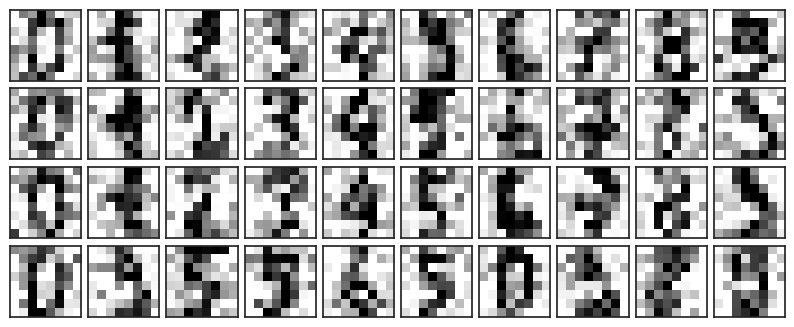

In [ ]:
np.random.seed(99)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)


It is immediately apparent that the images are noisy and contain spurious pixels. Let’s train a PCA on the noisy data, specifying that the projection should preserve 50% of the variance:

In [ ]:
pca = PCA(0.5).fit(noisy)  # try different values in place of 0.50
pca.n_components_

np.int64(12)

In this case, preserving 50% of the variance corresponds to 12 principal components. We compute these components and then use the inverse transform to reconstruct the filtered digits:

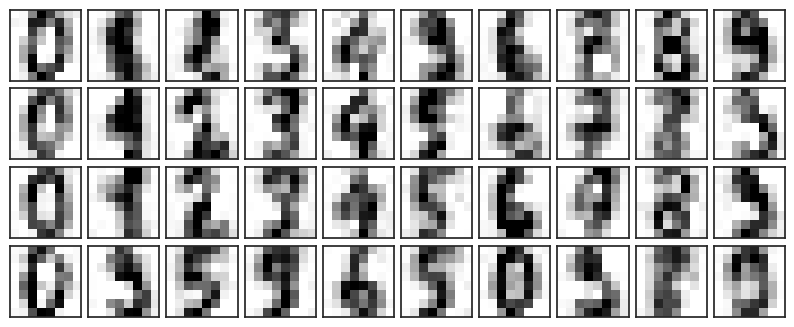

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal-preserving and noise-filtering property makes PCA a powerful tool for feature selection. For example, instead of training a classifier on very high-dimensional data, you can train it on the lower-dimensional representation produced by PCA. This automatically reduces the impact of random noise in the inputs while retaining the most informative features.

# Example: Eigenfaces
Earlier, we explored using a PCA projection as a feature selector for facial recognition with a support vector machine (see In-Depth: Support Vector Machines). Here, we’ll revisit that example and examine in more detail what went into it. Recall that we were using the Labeled Faces in the Wild dataset, available through Scikit-Learn:

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
faces.data.shape

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


(1348, 2914)

Let's take a look at the principal axes that span this dataset.

In [ ]:
pca = PCA(150)
pca.fit(faces.data)
pca.n_components_

150

In this case, it can be informative to visualize the images corresponding to the first several principal components. These components are technically eigenvectors, and the resulting images are commonly called eigenfaces. As the figure shows, they are as the name suggests, somewhat eerie:

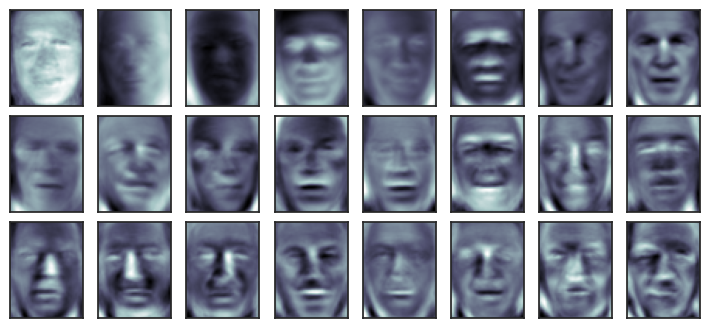

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

The results are quite interesting and provide insight into how the images vary. For example, the first few eigenfaces (top-left) appear to capture variations in lighting and head angle, while later principal components highlight specific facial features such as eyes, noses, and lips.

Next, let’s examine the cumulative variance of these components to understand how much of the dataset’s information is preserved by the projection:

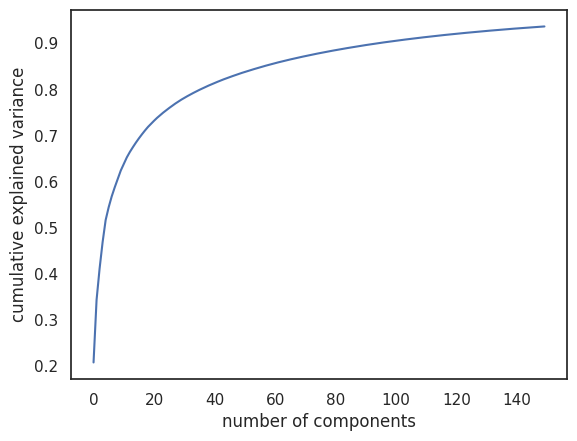

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We observe that these 150 components capture just over 90% of the variance. This suggests that using these components would allow us to recover most of the essential characteristics of the data. To make this more concrete, we can compare the original input images with the images reconstructed from these 150 components:

In [ ]:
# Compute the components and projected faces
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

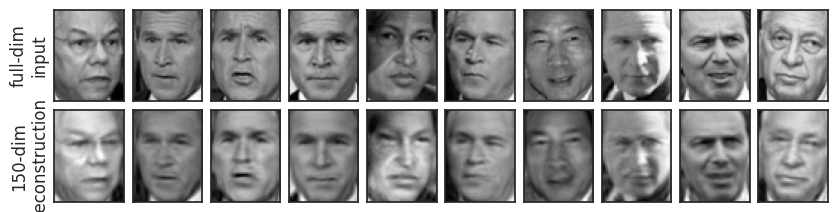

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

The top row shows the original input images, while the bottom row displays the reconstructions using only 150 of the ~3,000 original features. This visualization illustrates why the PCA-based feature selection used in In-Depth: Support Vector Machines was so effective: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images still retain enough information for us to recognize the individuals by eye.

In practical terms, this means that our classification algorithm can be trained on 150-dimensional data instead of 3,000-dimensional data. Depending on the algorithm used, this can lead to significantly more efficient and faster classification without sacrificing much accuracy.

# Compared with T-SNE
![image.png](attachment:image.png)
As these high-level plots show, PCA does a reasonable job of visualizing the two target clusters (M for Malignant and B for Benign, though we are using the labels here for reference). However, the t-SNE visualizations provide a much clearer separation between the clusters, making the distinctions in the target variable more obvious.

# STANDARDISATION AND VISUALISATION
Next, let’s try scaling (or standardizing) our features to see if this produces even clearer and more intuitive clusters in our plots.

![image.png](attachment:image.png)

Even when using the same dataset, the clarity of the clusters can depend significantly on the type of preprocessing applied to the data.

# Principal Component Analysis Summary
In this section, we have explored the use of **principal component analysis (PCA)** for **dimensionality reduction**, **visualization of high-dimensional data**, **noise filtering**, and **feature selection**. Due to its versatility and interpretability, PCA has proven effective across a wide variety of contexts and disciplines.

For any high-dimensional dataset, I often start with PCA to:

1. **Visualize relationships** between points (as with the digits dataset).
2. **Understand the main sources of variance** (as with the eigenfaces).
3. **Assess intrinsic dimensionality** by examining the explained variance ratio.

While PCA is not always the optimal choice, it provides a straightforward and efficient way to gain insight into complex datasets.

A key limitation of PCA is its **sensitivity to outliers**. To address this, several robust PCA variants have been developed. Scikit-Learn includes options such as **RandomizedPCA** and **SparsePCA**, both in the `sklearn.decomposition` module. RandomizedPCA uses a non-deterministic algorithm to quickly approximate the first few components in very high-dimensional data, while SparsePCA adds a **regularization term** (see *In Depth: Linear Regression*) to enforce sparsity in the components.

![image.png](attachment:image.png)